***PREDICTING COMPANY PROFIT USING MACHINE LEARNING REGRESSION MODEL***

***Importing requered libraries***

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

***Importing Data as CSV***

In [49]:
df = pd.read_csv(r"C:\Users\swati\OneDrive\Documents\Startup.csv")
df.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [51]:
df.describe()

,RD_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [53]:
df.tail()

,RD_Spend,Administration,Marketing_Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [55]:
print('There are ',df.shape[0],'rows and ', df.shape[1],'columns in the dataset.')

There are  50 rows and  5 columns in the dataset.


In [57]:
print('There are ',df.duplicated().sum(),'duplicate values in the dataset.')
#using duplicated() pre-defined function

There are  0 duplicate values in the dataset.


***DATA CLEANING***

***Checking for null values***

In [61]:
# Check for missing values
print(df.isnull().sum())

RD_Spend           0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [65]:
df=df.drop(columns=['State'])

In [67]:
cor = df.corr()
cor

,RD_Spend,Administration,Marketing_Spend,Profit
RD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [69]:
print(df.dtypes)

RD_Spend           float64
Administration     float64
Marketing_Spend    float64
Profit             float64
dtype: object


***Heatmap using seaborn library***

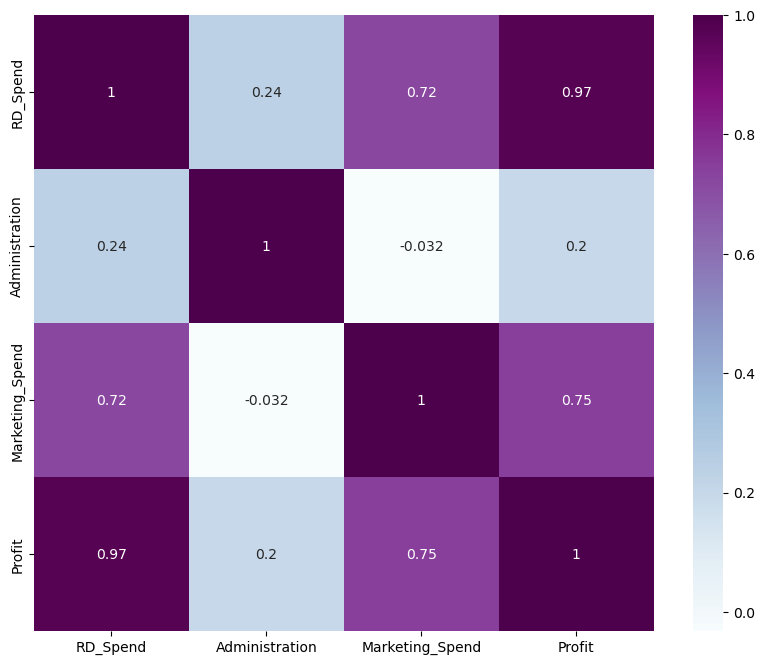

In [73]:
sns.heatmap(cor,annot=True,cmap='BuPu')
plt.show()

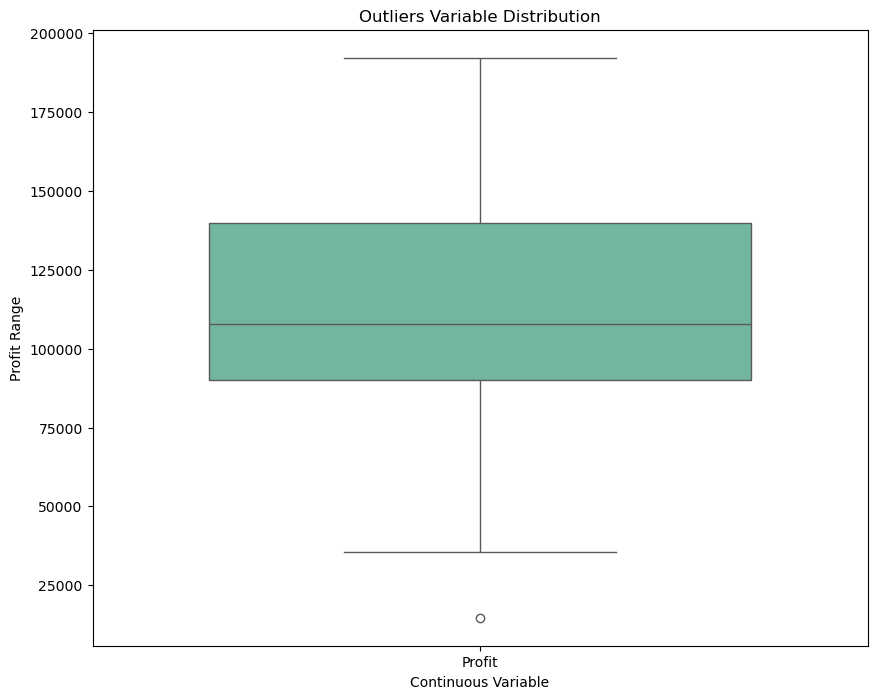

In [75]:
outliers = ['Profit']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data=df[outliers], orient="v", palette="Set2", width=0.7)
#orient = "v" : vertical boxplot ,
#orient = "h" : horizontal boxplot

plt.title('Outliers Variable Distribution')
plt.ylabel('Profit Range')
plt.xlabel('Continuous Variable')

plt.show()

***Histogram on Profit***

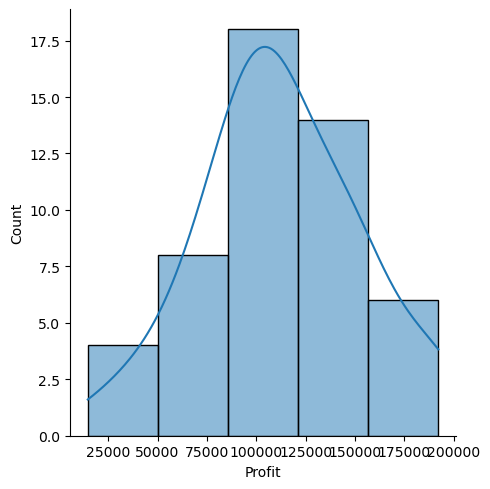

In [78]:
sns.displot(df['Profit'], bins=5,kde=True)
plt.show()

***Pair Plot***

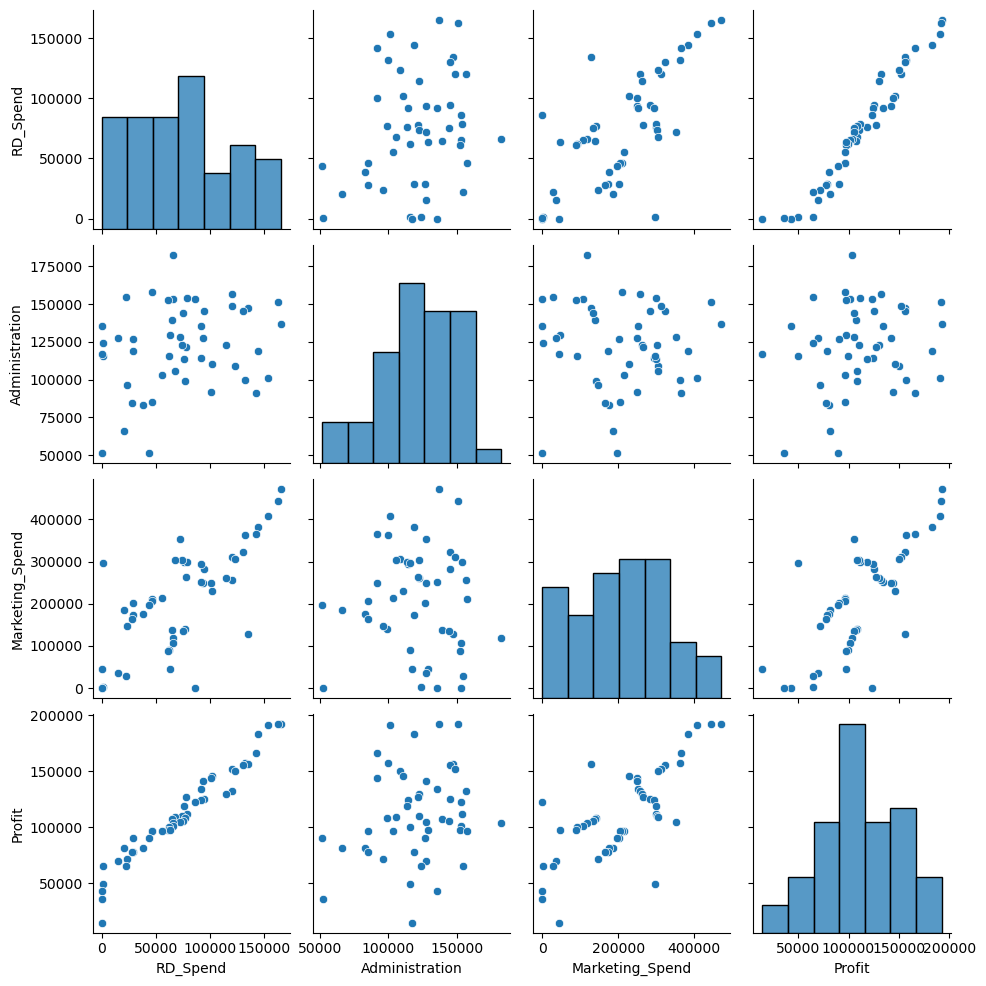

In [81]:
sns.pairplot(df)
plt.show()

***MODEL DEVELOPEMENT***

In [84]:
 X = df.iloc[:,:-1].values  # features
 y = df.iloc[:,-1].values   # Target variable(profit)

In [86]:
# Import the necessary class
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
X[:, 2] = labelencoder.fit_transform(X[:, 2])
X1 = pd.DataFrame(X)
X1.head()

,0,1,2
0,165349.20,136897.80,47.0
1,162597.70,151377.59,46.0
2,153441.51,101145.55,45.0
3,144372.41,118671.85,44.0
4,142107.34,91391.77,43.0


***Splitting the data into Training and Teasting data***

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)
X_train

array([[1.3187690e+05, 9.9814710e+04, 4.2000000e+01],
       [9.4657160e+04, 1.4507758e+05, 3.1000000e+01],
       [2.8754330e+04, 1.1854605e+05, 1.6000000e+01],
       [0.0000000e+00, 1.1698380e+05, 4.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.6000000e+01],
       [9.3863750e+04, 1.2732038e+05, 2.6000000e+01],
       [4.4069950e+04, 5.1283140e+04, 1.9000000e+01],
       [7.7044010e+04, 9.9281340e+04, 1.3000000e+01],
       [1.3461546e+05, 1.4719887e+05, 1.0000000e+01],
       [6.7532530e+04, 1.0575103e+05, 3.7000000e+01],
       [2.8663760e+04, 1.2705621e+05, 2.0000000e+01],
       [7.8389470e+04, 1.5377343e+05, 3.5000000e+01],
       [8.6419700e+04, 1.5351411e+05, 0.0000000e+00],
       [1.2333488e+05, 1.0867917e+05, 3.8000000e+01],
       [3.8558510e+04, 8.2982090e+04, 1.7000000e+01],
       [1.3154600e+03, 1.1581621e+05, 3.3000000e+01],
       [1.4437241e+05, 1.1867185e+05, 4.4000000e+01],
       [1.6534920e+05, 1.3689780e+05, 4.7000000e+01],
       [0.0000000e+00, 1.354

***Constuct different regression algorithms***

***A. LINEAR REGRESSION***

In [93]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)
y_pred_lin

array([100927.31704798, 134226.52141799, 135058.69402383,  69607.61477333,
       183942.70747771, 113327.9049821 ,  63720.74696839,  96051.59874357,
       113823.43806907, 173783.01633461,  95053.72943631,  86486.18581817,
       109341.72356373,  87037.70399387, 128144.13269174, 162968.34274829,
       151393.39267092,  43399.42550607,  42808.28639507, 100331.07365795,
       146985.55677234,  97025.15517852,  97783.01056754, 115919.71310582,
        65734.63342857, 115313.5740501 ,  56279.43382001, 154381.54979557,
       127221.35809696, 100428.48692064])

***B. DECISION TREE REGRESSION***

In [96]:
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)
y_pred_tree

array([111313.02, 141585.52, 141585.52,  78239.91, 182901.99, 108733.99,
        65200.33, 111313.02, 108552.04, 182901.99,  90708.19,  90708.19,
       111313.02,  90708.19, 141585.52, 156991.12, 149759.96,  49490.75,
        14681.4 , 111313.02, 149759.96, 108733.99, 108733.99, 108552.04,
        65200.33, 108552.04,  65200.33, 149759.96, 141585.52, 111313.02])

***C. RANDOM FOREST REGRESSION***

In [99]:
rf_reg = RandomForestRegressor(n_estimators=10, random_state=0)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
y_pred_rf

array([110143.495, 119437.487, 129557.556,  79346.25 , 179591.784,
       137559.067,  77232.637, 104690.648, 112534.949, 164677.52 ,
        97912.308,  87217.256, 110401.398,  88585.77 , 119730.847,
       163293.459, 142500.883,  41414.513,  37153.393, 110143.495,
       136705.598, 107058.823, 108452.38 , 113050.755,  76461.749,
       109231.601,  76077.347, 149960.496, 125502.837, 110143.495])

***Calculate different regression matrics***

***A. MEAN ABSOLUTE ERROR (MAE)***

In [103]:
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"The Mean Absolute Error (MAE) for the Linear Regression model is: {mae_lin}")
print(f"The Mean Absolute Error (MAE) for the Decision Tree Regression is: {mae_tree}")
print(f"The Mean Absolute Error (MAE) for the Random Forest Regression is: {mae_rf}")

The Mean Absolute Error (MAE) for the Linear Regression model is: 7711.388704173032
The Mean Absolute Error (MAE) for the Decision Tree Regression is: 9153.623000000001
The Mean Absolute Error (MAE) for the Random Forest Regression is: 8706.413933333337


***B. MEAN SQUARED ERROR (MSE)***

In [106]:
mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_tree = mean_squared_error(y_test, y_pred_tree)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"The Mean Squared Error (MSE) for the Linear Regression model is: {mse_lin}")
print(f"The Mean Squared Error (MSE) for the Decision Tree Regression is: {mse_tree}")
print(f"The Mean Squared Error (MSE) for the Random Forest Regression is:  {mse_rf}")

The Mean Squared Error (MSE) for the Linear Regression model is: 89640824.3819464
The Mean Squared Error (MSE) for the Decision Tree Regression is: 119800025.97291668
The Mean Squared Error (MSE) for the Random Forest Regression is:  128246868.31487516


***C. R-Squared (R²)***

In [108]:
r2_lin = r2_score(y_test, y_pred_lin)
r2_tree = r2_score(y_test, y_pred_tree)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"The R-squared (R²) for the Linear Regression model is: {r2_lin}")
print(f"The R-squared (R²) for the Decision Tree Regression is: {r2_tree}")
print(f"The R-squared (R²) for the Random Forest Regression is:  {r2_rf}")

The R-squared (R²) for the Linear Regression model is: 0.9152626678220549
The R-squared (R²) for the Decision Tree Regression is: 0.8867532213610698
The R-squared (R²) for the Random Forest Regression is:  0.8787684344035614


***Visualise the Model Performance***

***Comparing the Predicted values and actual Values***

In [113]:
df = pd.DataFrame(data={'Predicted value': y_pred_lin, 'Actual value': y_test})
df.head(10)

,Predicted value,Actual value
0,100927.317048,103282.38
1,134226.521418,144259.40
2,135058.694024,146121.95
3,69607.614773,77798.83
4,183942.707478,191050.39
5,113327.904982,105008.31
6,63720.746968,81229.06
7,96051.598744,97483.56
8,113823.438069,110352.25
9,173783.016335,166187.94


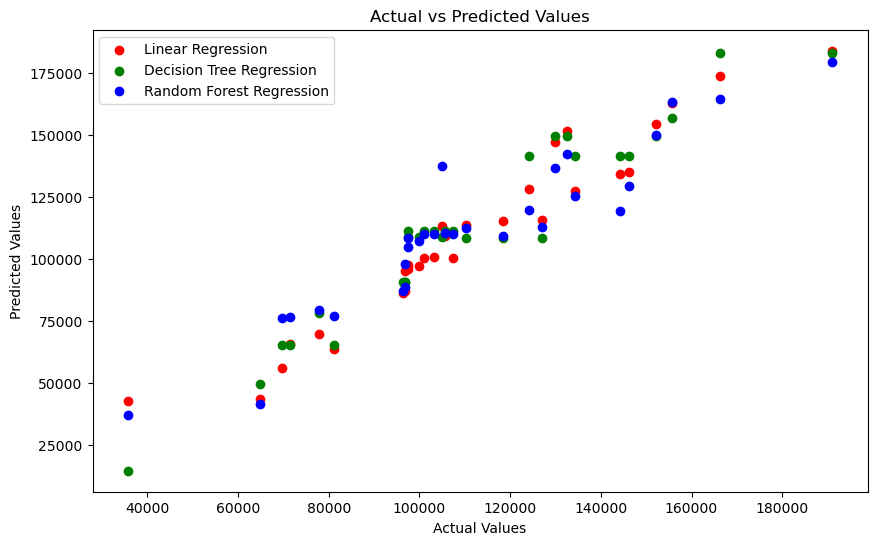

In [115]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lin, c='r', label='Linear Regression')
plt.scatter(y_test, y_pred_tree, c='g', label='Decision Tree Regression')
plt.scatter(y_test, y_pred_rf, c='b', label='Random Forest Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

***TO CHOOSE THE BEST MODEL :-***

In [118]:
# Create a dictionary of the models and their scores
model_scores = {
    'Linear Regression': (mae_lin, mse_lin, r2_lin),
    'Decision Tree Regression': (mae_tree, mse_tree, r2_tree),
    'Random Forest Regression': (mae_rf, mse_rf, r2_rf)
}

# Print out the scores for comparison
for model_name, scores in model_scores.items():
    print(f"{model_name} - MAE: {scores[0]}, MSE: {scores[1]}, R²: {scores[2]}")

# Choose the best model based on R² score
best_model = max(model_scores, key=lambda k: model_scores[k][2])
print(f"The best model is: {best_model}")

Linear Regression - MAE: 7711.388704173032, MSE: 89640824.3819464, R²: 0.9152626678220549
Decision Tree Regression - MAE: 9153.623000000001, MSE: 119800025.97291668, R²: 0.8867532213610698
Random Forest Regression - MAE: 8706.413933333337, MSE: 128246868.31487516, R²: 0.8787684344035614
The best model is: Linear Regression
